In [2]:
#Using the older version of Keras because the 'keras.wrappers' module is not present in the later versions.
!pip install keras==2.12.0
!pip install keras-tuner

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('gas_turbines.csv')
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [109]:
df.shape

(15039, 11)

# EDA

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [111]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [112]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [113]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

## Outlier Detection

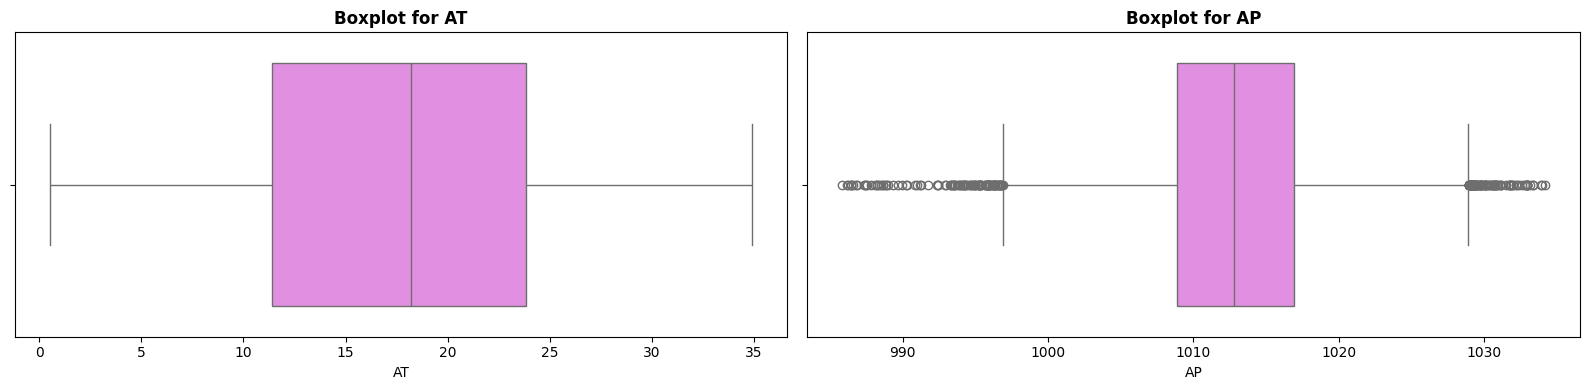

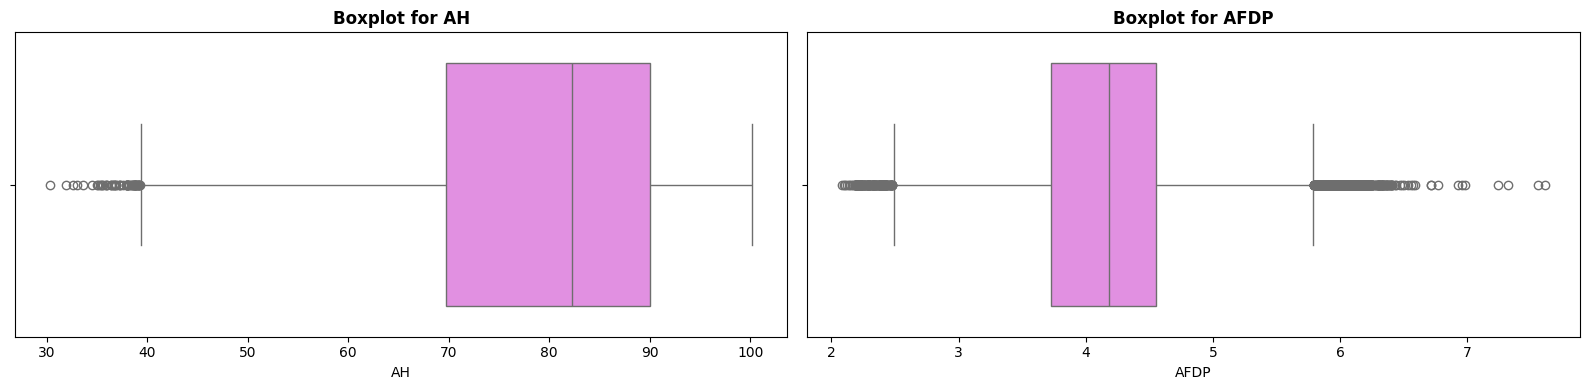

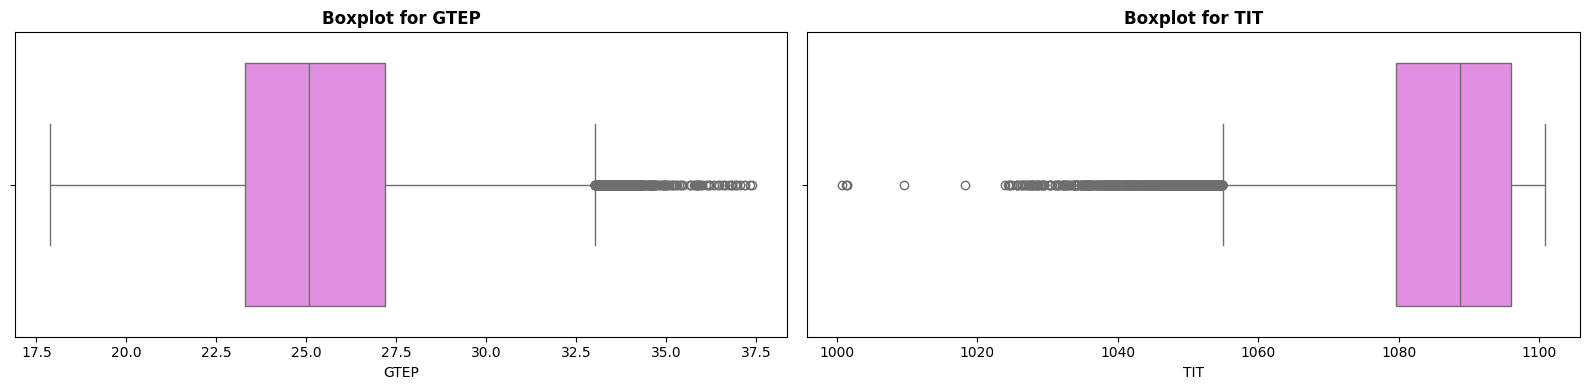

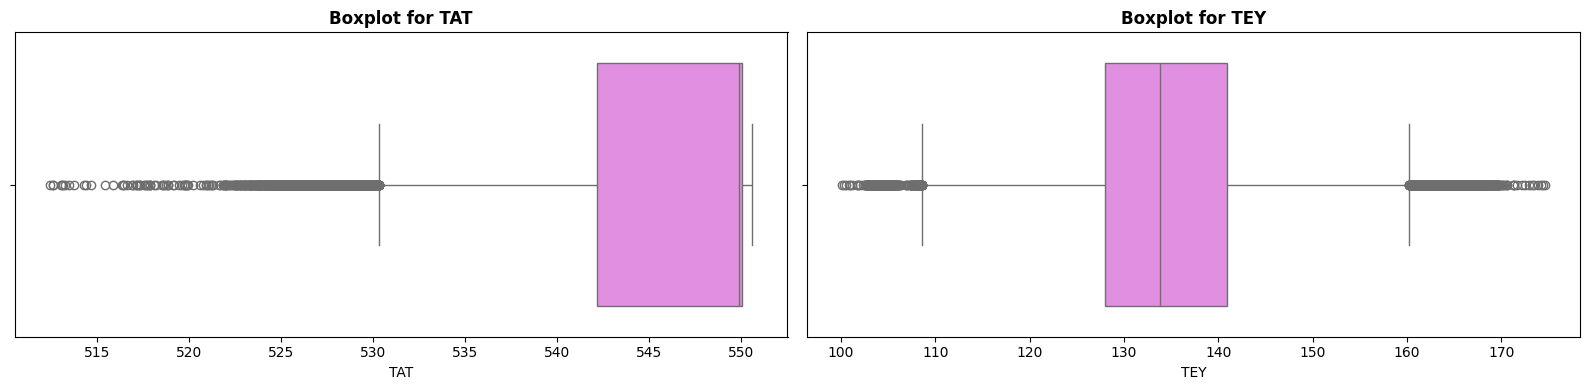

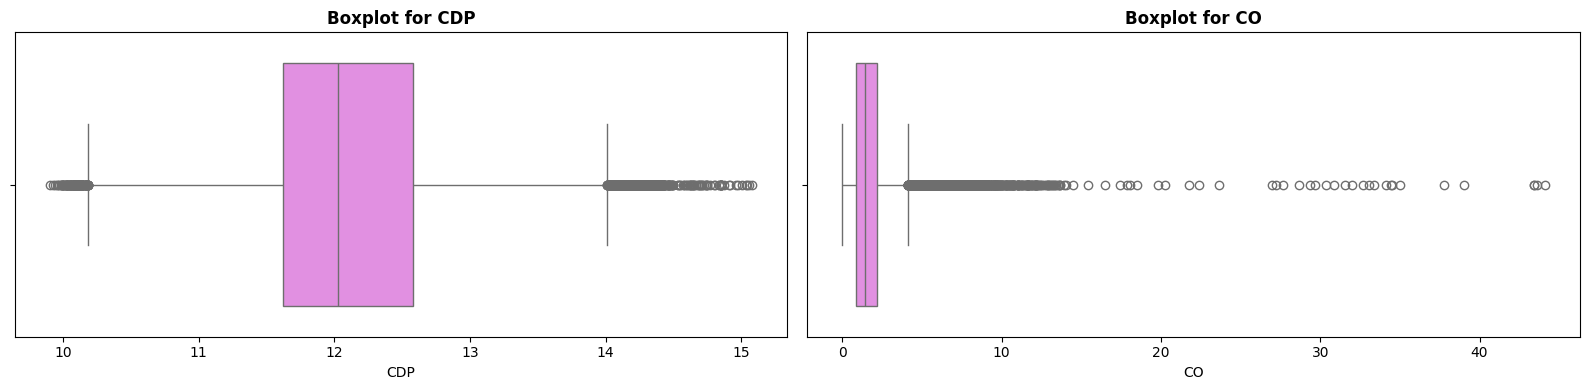

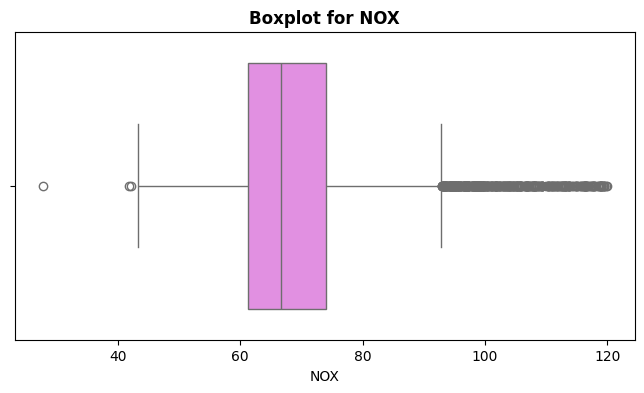

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

box_color = "violet"

num_features = len(df.columns)

rows = num_features // 2
remaining_cols = num_features % 2

for i in range(rows):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    # Get the starting and ending indices for the current row
    start_idx = i * 2
    end_idx = min(start_idx + 2, num_features)

    # Plot the boxplots on each subplot with specified color
    for j, column in enumerate(df.columns[start_idx:end_idx]):
        sns.boxplot(x=df[column], ax=axes[j], color=box_color)  # Use box_color here
        axes[j].set_title(f'Boxplot for {column}', fontweight='bold')  # Apply bold font weight

    plt.tight_layout()
    plt.show()

# Handle remaining columns if any
if remaining_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[df.columns[-1]], color=box_color)
    plt.title(f'Boxplot for {df.columns[-1]}', fontweight='bold')
    plt.show()

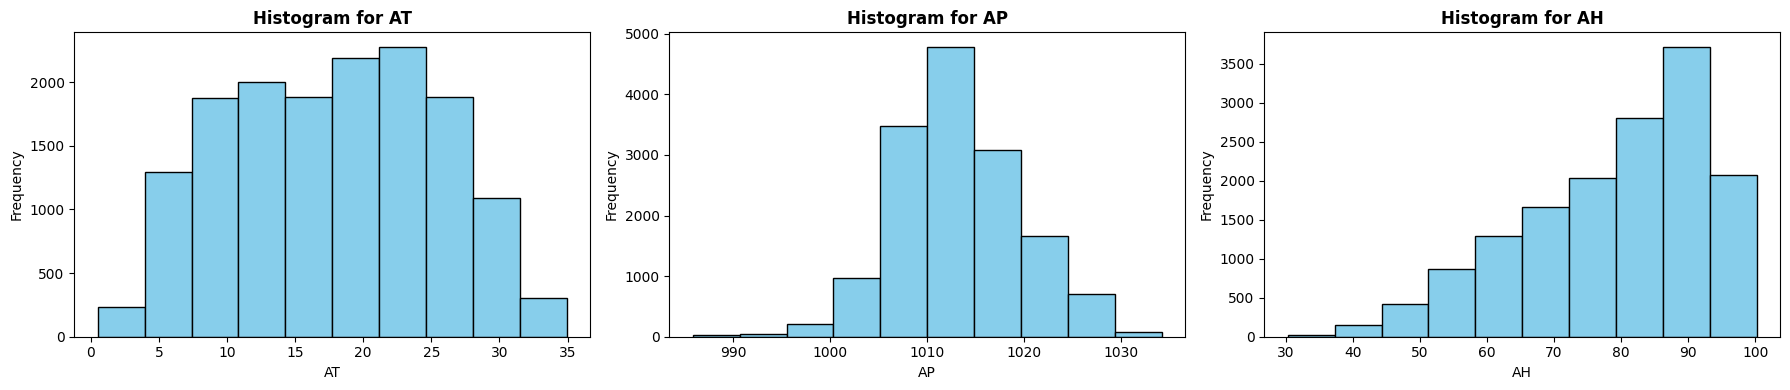

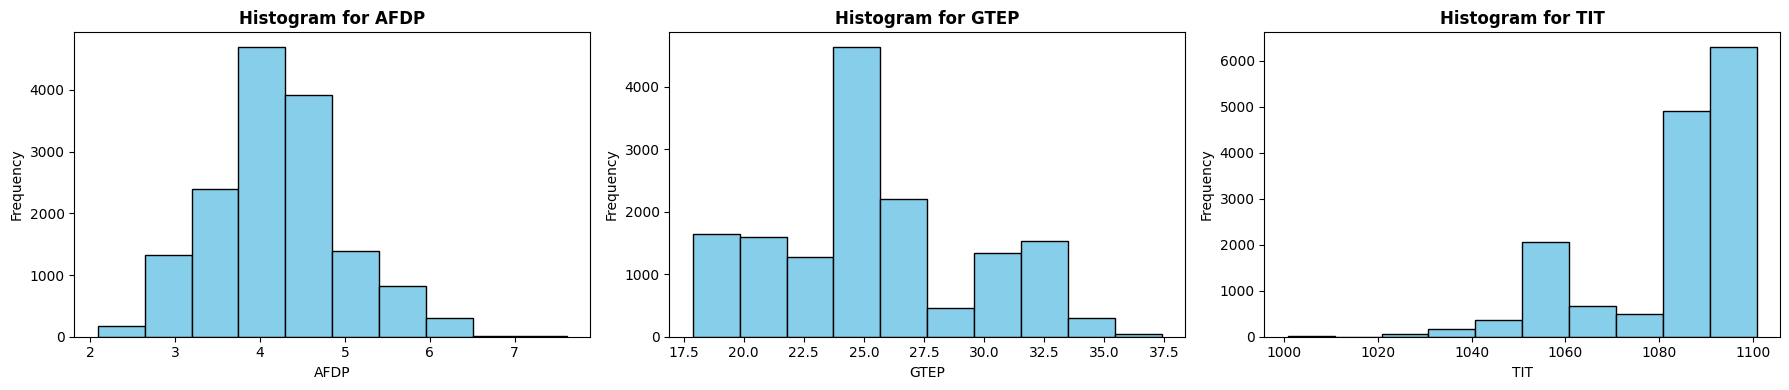

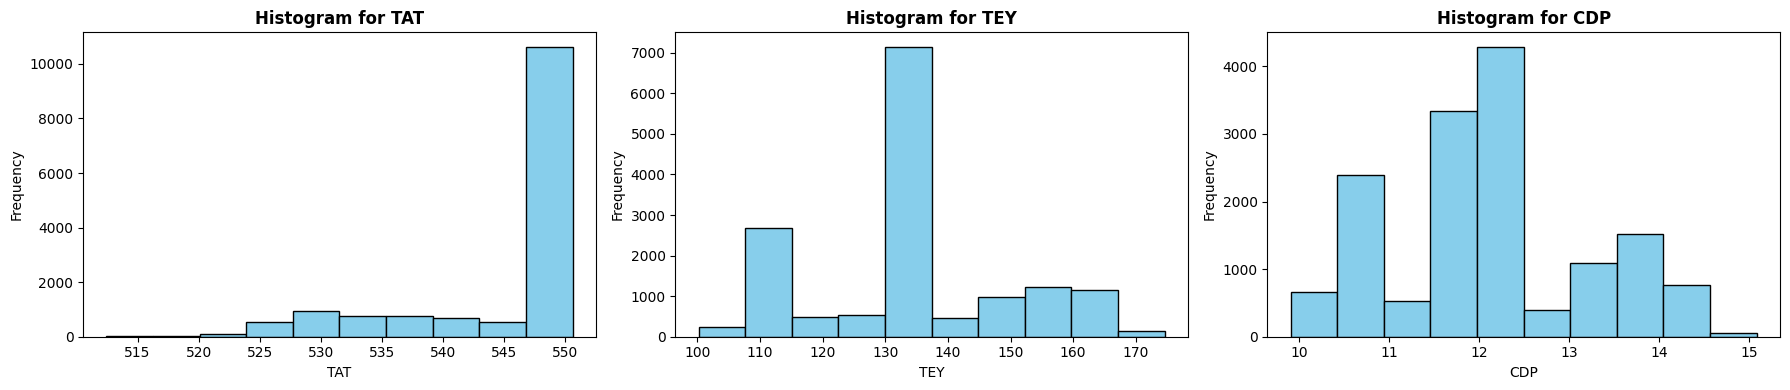

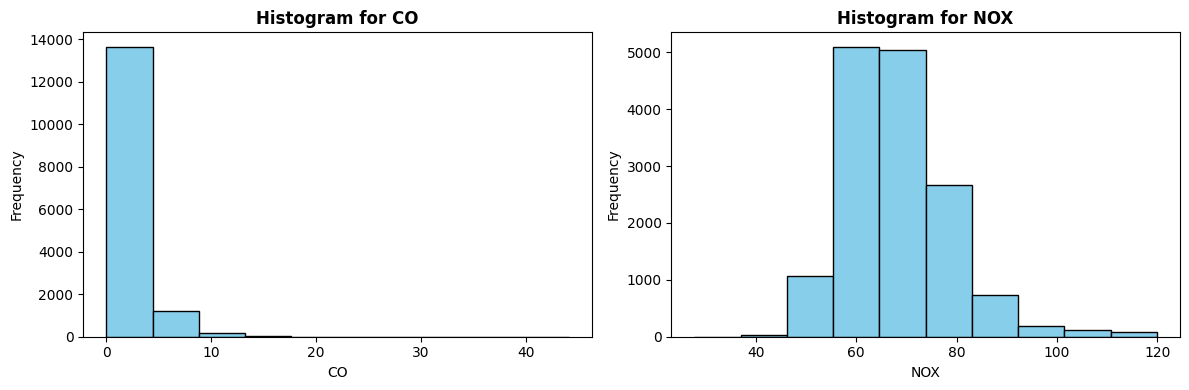

In [131]:
num_columns = 11
rows = (num_columns + 2) // 3  # Ensure at least 1 row, rounding up

for i in range(rows):
    # Calculate the number of columns in the current row
    if i == rows - 1 and num_columns % 3 != 0:
        cols_in_row = num_columns % 3
    else:
        cols_in_row = 3

    # Create a figure with the calculated number of subplots
    fig, axes = plt.subplots(1, cols_in_row, figsize=(6 * cols_in_row, 4))

    # Get the starting and ending indices for the current row
    start_idx = i * 3
    end_idx = min(start_idx + 3, num_columns)

    # Plot histograms on each subplot
    for j, column in enumerate(df.columns[start_idx:end_idx]):
        plt.sca(axes[j])  # Set the current subplot
        plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram for {column}', fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


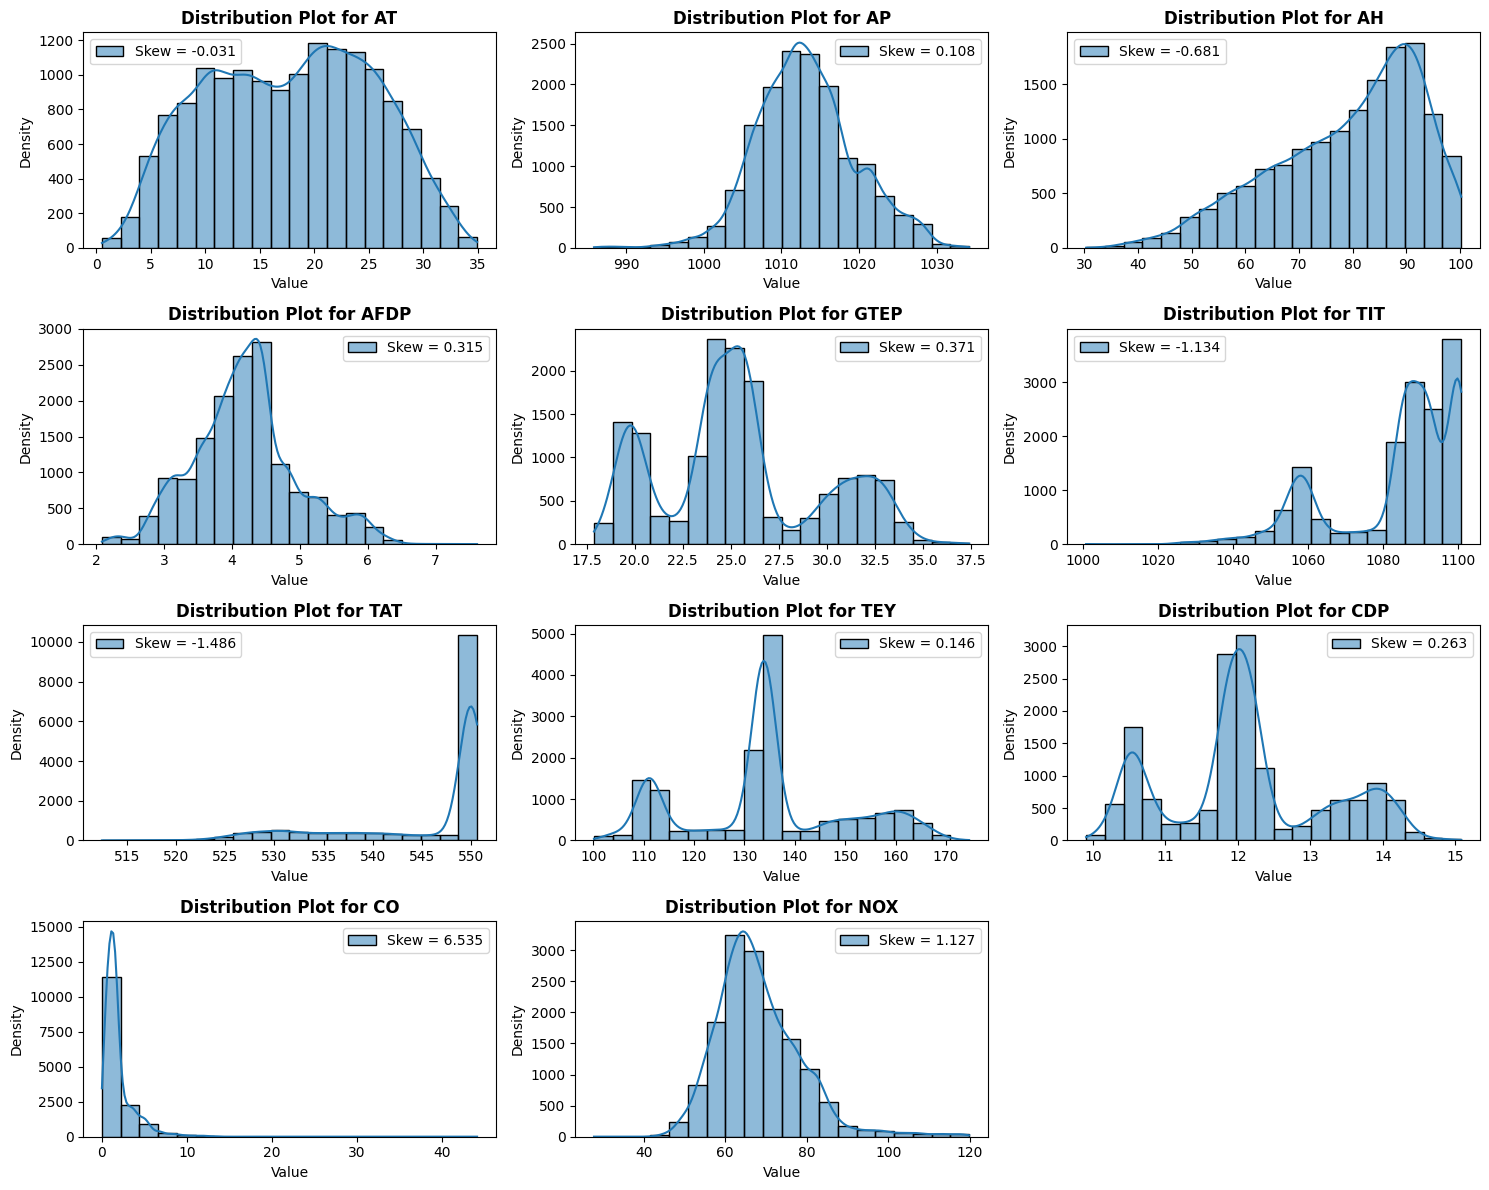

In [132]:
#  Distribution plot for all numerical features
numerical_features = df.select_dtypes(include = 'number').columns
num_features = len(numerical_features)

# Determine the number of rows and columns for subplots
rows = (num_features + 2) // 3
cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    skewness = df[feature].skew()

    # Use histplot from seaborn for each feature
    sns.histplot(df[feature], kde=True, label=f'Skew = {skewness:.3f}', bins=20, ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(f'Distribution Plot for {feature}', fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Remove empty subplots in the last row and last column
for j in range(num_features, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


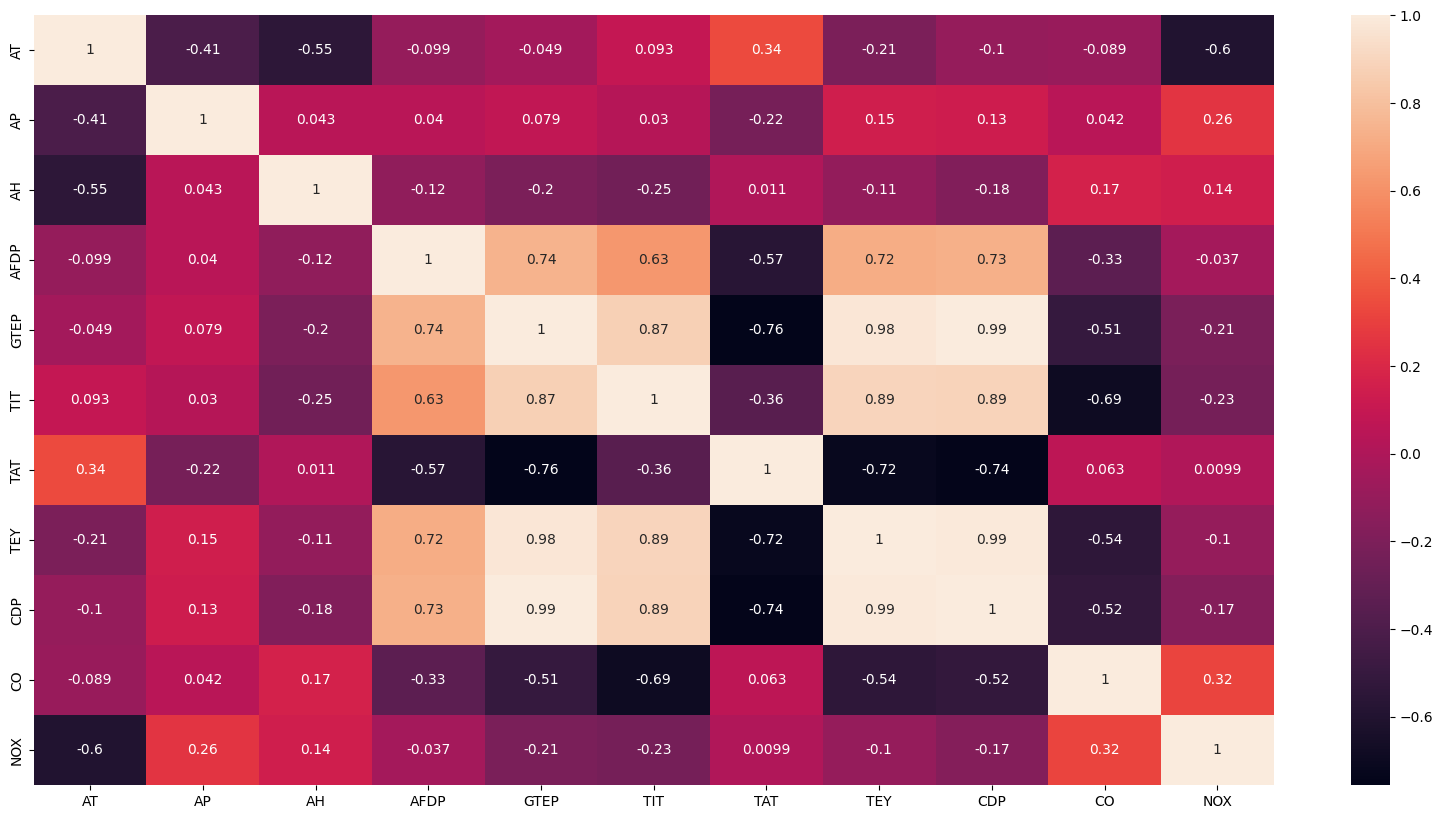

In [136]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

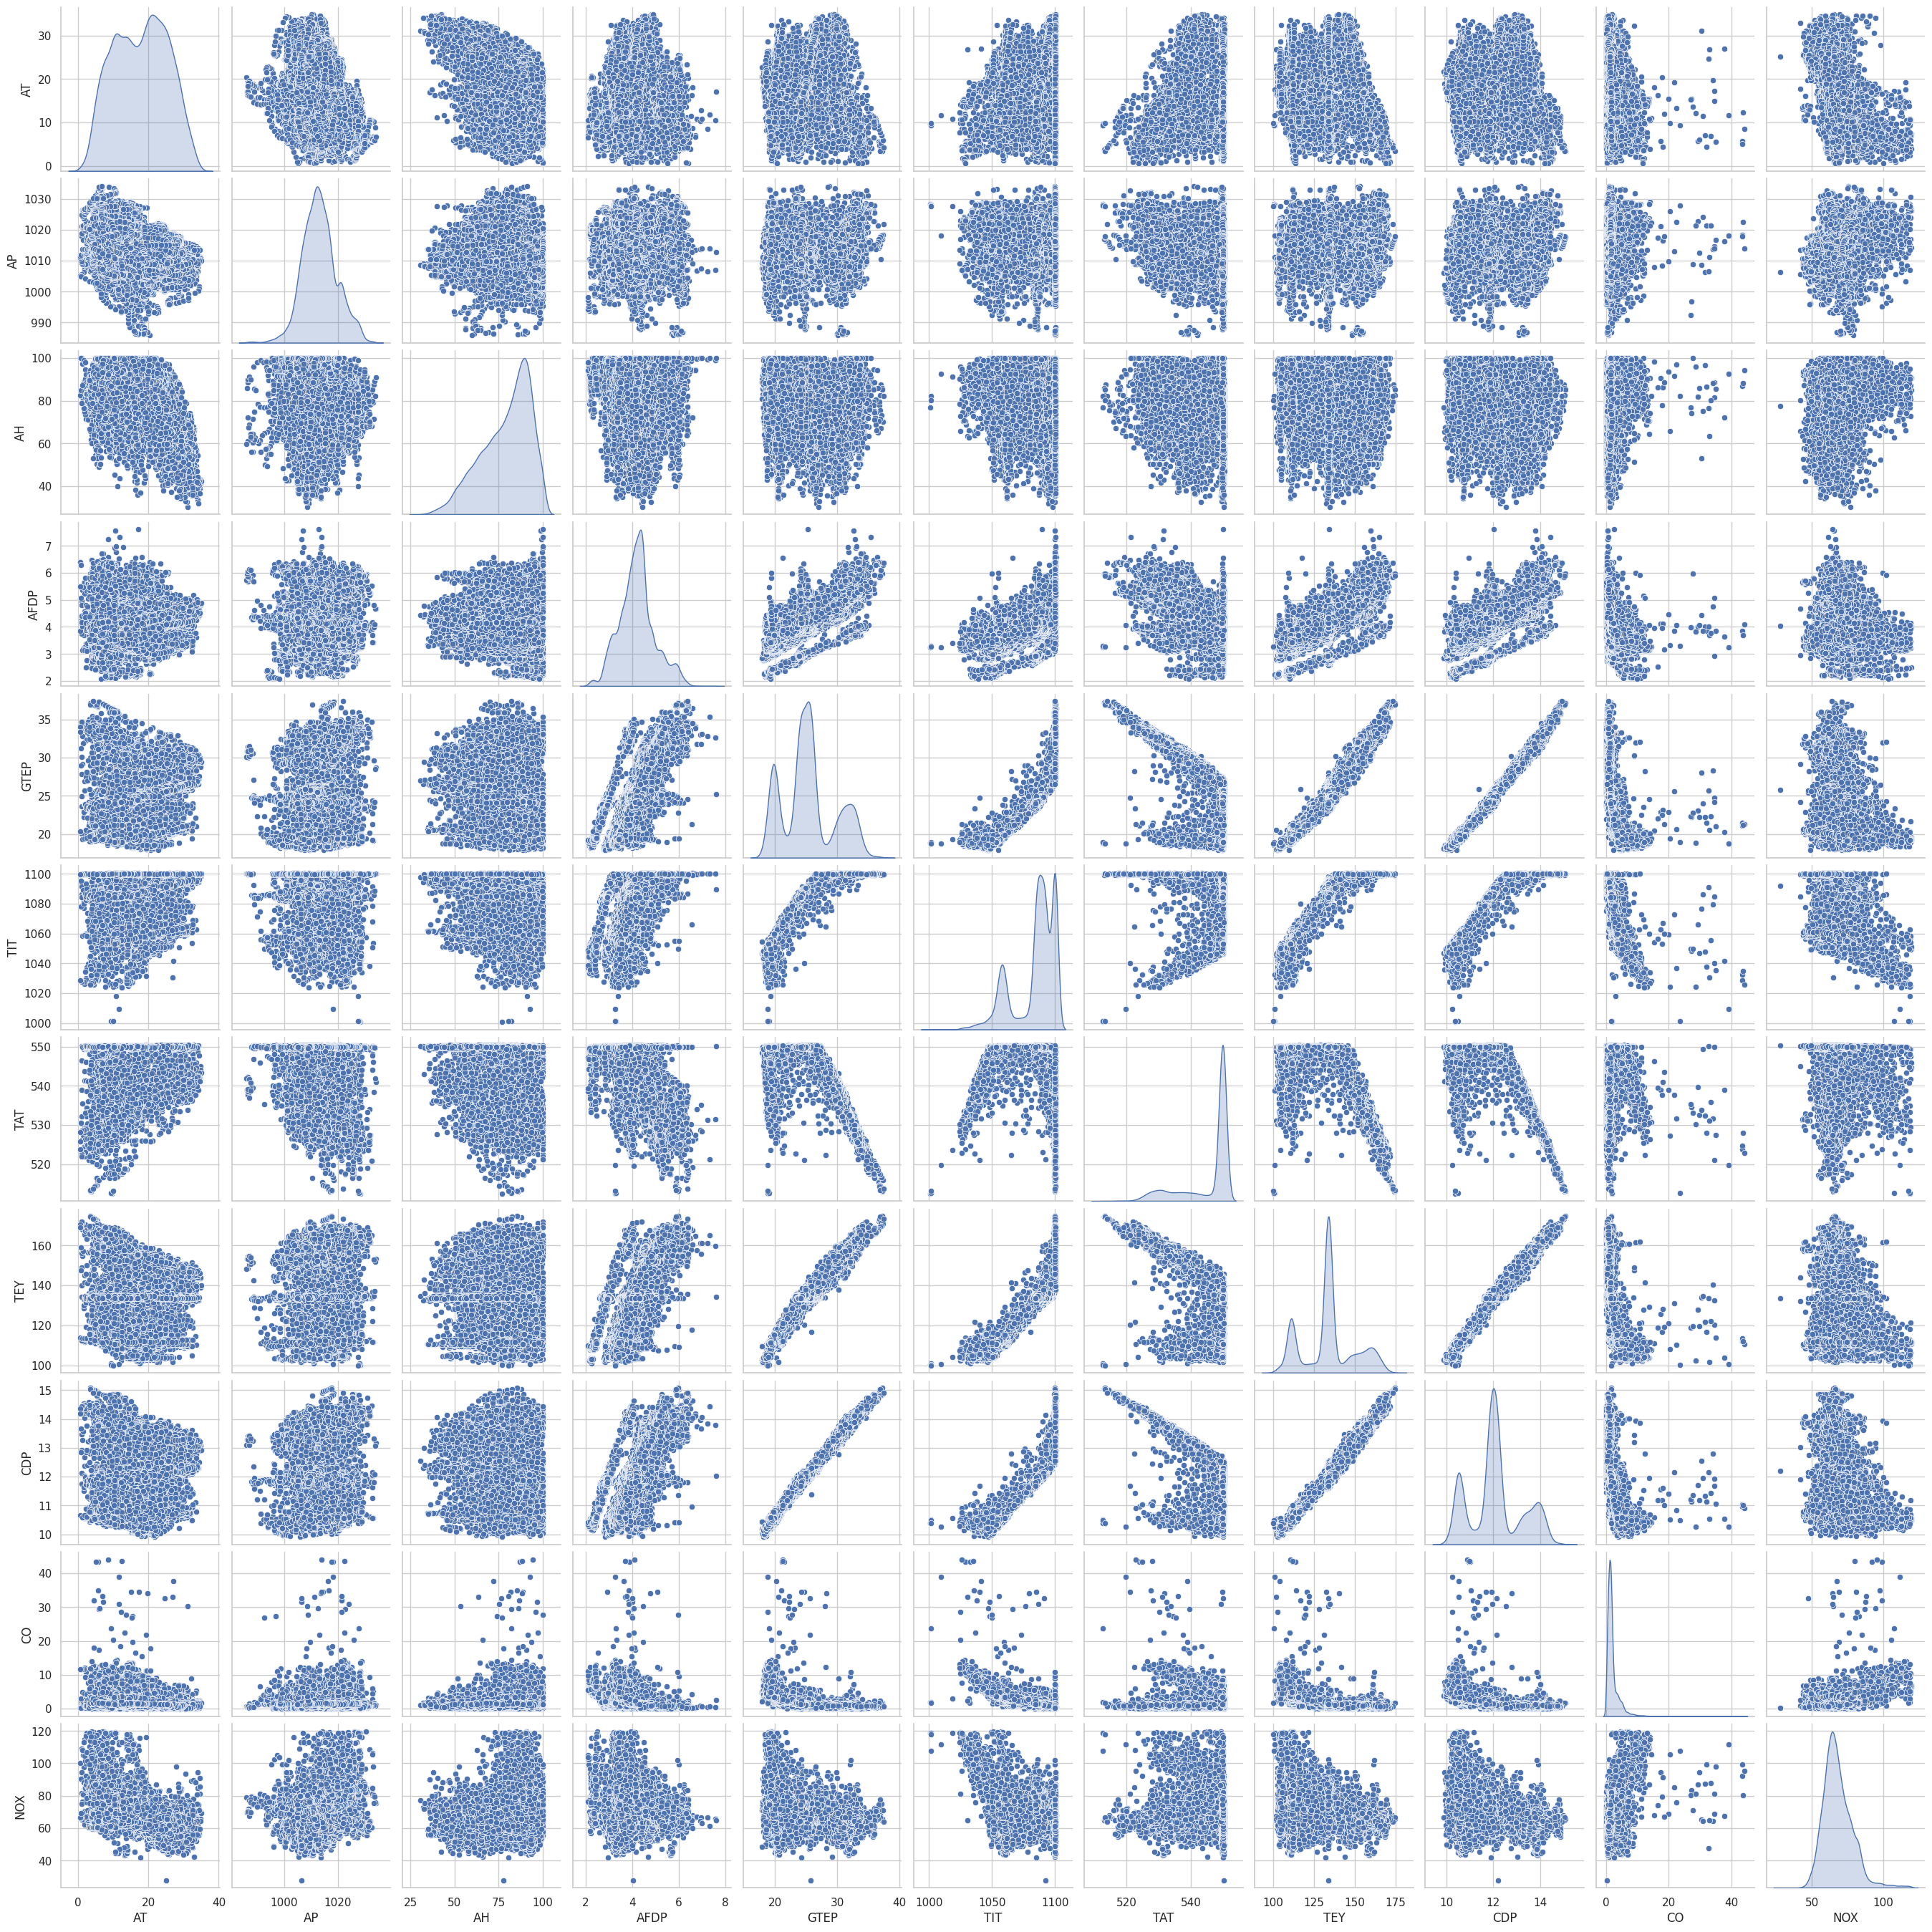

In [137]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df[numerical_features], diag_kind="kde")
plt.show()

# Data Preprocessing

In [10]:
# Standardization
target_variable = 'TEY'
features_to_standardize = [col for col in df.columns if col != target_variable]

SS = StandardScaler()
df[features_to_standardize] = SS.fit_transform(df[features_to_standardize])
df

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

          TEY       CDP        CO       NOX  
0      114.70 -1.357331  0.532012  1.387845  
1      114.72 -1.363676  0.568733  1.393002  
2      114.71 -1.360957  0.552938  1.363586  
3      114.72 -1.356424  0.548933  1.382878  
4      114.72 -1.350985  0.574179  1.348591  
...       ...       ...       ...       ...  
15034  111.61 -1.543161  1.145792  1.085751  
15035  111.78 -1.513247  1.293578  1.119943  
15036  110.19 -1.467922  2.695925  2.170062  
15037  110.74 -1.422598  1.924683  2.391165  
15038  111.58 -1.377273  1.354150  2.321539  

[15039 rows x 11 columns]

## Splitting the data as **X**(Input) and **Y**(Output)

In [11]:
X = df.drop('TEY', axis = 1)
X

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

            CDP        CO       NOX  
0     -1.357331  0.532012  1.387845  
1     -1.363676  0.568733  1.393002  
2     -1.360957  0.552938  1.363586  
3     -1.356424  0.548933  1.382878  
4     -1.350985  0.574179  1.348591  
...         ...       ...       ...  
15034 -1.543161  1.145792  1.085751  
15035 -1.513247  1.293578  1.119943  
15036 -1.467922  2.695925  2.170062  
15037 -1.422598  1.924683  2.391165  
15038 -1.377273  1.354150  2.321539  

[15039 rows x 10 columns]

In [12]:
Y = df['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [79]:
len(X_train.columns)

10

### Tuning of Hyperparameters :- **Batch Size** and **Epochs**

In [15]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [16]:
# Create model for regression
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))  # Use linear activation for regression

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [17]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(),
                    verbose = 10, error_score='raise')
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-2.856 total time=  29.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-2.549 total time=  17.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-10.387 total time=  22.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.181 total time=  22.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.533 total time=  16.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [18]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.5399742007255555, using {'batch_size': 40, 'epochs': 100}
-3.7012291669845583,3.399868024164383 with: {'batch_size': 10, 'epochs': 10}
-0.6075895428657532,0.07152232551481784 with: {'batch_size': 10, 'epochs': 50}
-0.6377009272575378,0.08085827083546947 with: {'batch_size': 10, 'epochs': 100}
-31.26713409423828,8.313780791134182 with: {'batch_size': 20, 'epochs': 10}
-0.6036819338798523,0.04214167033495959 with: {'batch_size': 20, 'epochs': 50}
-0.6186865091323852,0.1134810888805739 with: {'batch_size': 20, 'epochs': 100}
-132.58408813476564,22.751069857318097 with: {'batch_size': 40, 'epochs': 10}
-0.6278017640113831,0.05798086318811717 with: {'batch_size': 40, 'epochs': 50}
-0.5399742007255555,0.03845751110857166 with: {'batch_size': 40, 'epochs': 100}


In [19]:
batch_and_epochs = list(grid_result.best_params_.values())
batch_and_epochs

[40, 100]

In [20]:
best_batch_size = batch_and_epochs[0]
best_epochs = batch_and_epochs[1]

In [21]:
print('optimal Batch Size :',best_batch_size)
print('optimal epochs :', best_epochs)

optimal Batch Size : 40
optimal epochs : 100


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [22]:
# Defining the regression model
def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    adam = Adam(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])
    return model

# Create the model for regression
model = KerasRegressor(build_fn=create_model,
                                  verbose=0,
                                  batch_size=best_batch_size,
                                  epochs=best_epochs)

# Define the grid search parameters for regression
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate=learning_rate, dropout_rate=dropout_rate)

# Build and fit the GridSearchCV for regression
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.494 total time=  35.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.624 total time=  35.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.636 total time=  41.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.485 total time=  41.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.490 total time=  42.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.5459217190742492, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.5459217190742492,0.06899133311132404 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.8058138966560364,0.06636418965755735 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.8468937873840332,0.1599967044960002 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-16.780117511749268,8.43312586248738 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-5.779900789260864,3.0530496197534283 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-25.892854499816895,17.101740387268368 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-67.6705940246582,28.654751628741955 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-16.973664855957033,5.634498465669306 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-23.8755126953125,4.013943073238383 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [24]:
LR_and_dropout = list(grid_result.best_params_.values())
LR_and_dropout

[0.0, 0.001]

In [25]:
best_dropout = LR_and_dropout[0]
best_learning_rate = LR_and_dropout[1]

In [26]:
print('optimal Learning Rate :',best_learning_rate)
print('optimal dropout :', best_dropout)

optimal Learning Rate : 0.001
optimal dropout : 0.0


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [27]:
# Defining the regression model
def create_model(activation_function, init):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(best_dropout))
    model.add(Dense(8, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(best_dropout))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    adam = Adam(lr=best_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])
    return model

# Create the model for regression
model = KerasRegressor(build_fn=create_model,
                       verbose=0,
                       batch_size=best_batch_size,
                       epochs=best_epochs)

# Define the grid search parameters for regression
activation_functions = ['tanh', 'linear']  # Exclude 'softmax' and 'relu' for regression
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function=activation_functions, init=init)

# Build and fit the GridSearchCV for regression
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=tanh, init=uniform......................
[CV 1/5; 1/6] END activation_function=tanh, init=uniform;, score=-2.171 total time=  36.2s
[CV 2/5; 1/6] START activation_function=tanh, init=uniform......................
[CV 2/5; 1/6] END activation_function=tanh, init=uniform;, score=-4.915 total time=  36.2s
[CV 3/5; 1/6] START activation_function=tanh, init=uniform......................
[CV 3/5; 1/6] END activation_function=tanh, init=uniform;, score=-1.787 total time=  41.8s
[CV 4/5; 1/6] START activation_function=tanh, init=uniform......................
[CV 4/5; 1/6] END activation_function=tanh, init=uniform;, score=-1.311 total time=  36.6s
[CV 5/5; 1/6] START activation_function=tanh, init=uniform......................
[CV 5/5; 1/6] END activation_function=tanh, init=uniform;, score=-14.834 total time=  41.9s
[CV 1/5; 2/6] START activation_function=tanh, init=normal......................

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.5834094524383545, using {'activation_function': 'linear', 'init': 'uniform'}
-5.003750801086426,5.072407019181732 with: {'activation_function': 'tanh', 'init': 'uniform'}
-2.6943625688552855,2.275715182920744 with: {'activation_function': 'tanh', 'init': 'normal'}
-250.63721313476563,2.7334722436144694 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.5834094524383545,0.024842173974299168 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.6601098656654358,0.15537608693904897 with: {'activation_function': 'linear', 'init': 'normal'}
-250.6711853027344,2.7740035840253134 with: {'activation_function': 'linear', 'init': 'zero'}


In [29]:
activation_and_init = list(grid_result.best_params_.values())
activation_and_init

['linear', 'uniform']

In [30]:
best_activation = str(activation_and_init[0])
best_init = str(activation_and_init[1])

In [31]:
print('Best activation function :',best_activation)
print('Best Initialization :', best_init)

Best activation function : linear
Best Initialization : uniform


#### Tuning of Hyperparameter :- Number of Neurons in activation layer

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Defining the regression model
def create_model(neuron1, neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=10, kernel_initializer=best_init, activation=best_activation))
    model.add(Dropout(best_dropout))
    model.add(Dense(neuron2, input_dim=neuron1, kernel_initializer=best_init, activation=best_activation))
    model.add(Dropout(best_dropout))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    adam = Adam(lr=best_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])
    return model

# Create the regression model
model = KerasRegressor(build_fn=create_model,
                                  verbose=0,
                                  batch_size=best_batch_size,
                                  epochs=best_epochs)

# Define the grid search parameters for regression
neuron1 = [16, 32, 64]
neuron2 = [16, 32, 64]

# Make a dictionary of the grid search parameters
param_grids = dict(neuron1=neuron1, neuron2=neuron2)

# Build and fit the GridSearchCV for regression
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=16, neuron2=16......................................
[CV 1/5; 1/9] END ......neuron1=16, neuron2=16;, score=-0.591 total time=  41.9s
[CV 2/5; 1/9] START neuron1=16, neuron2=16......................................
[CV 2/5; 1/9] END ......neuron1=16, neuron2=16;, score=-0.652 total time=  41.8s
[CV 3/5; 1/9] START neuron1=16, neuron2=16......................................
[CV 3/5; 1/9] END ......neuron1=16, neuron2=16;, score=-0.697 total time=  37.4s
[CV 4/5; 1/9] START neuron1=16, neuron2=16......................................
[CV 4/5; 1/9] END ......neuron1=16, neuron2=16;, score=-0.572 total time=  41.8s
[CV 5/5; 1/9] START neuron1=16, neuron2=16......................................
[CV 5/5; 1/9] END ......neuron1=16, neuron2=16;, score=-0.530 total time=  42.0s
[CV 1/5; 2/9] START neuron1=16, neuron2=32......................................
[CV 1/5; 2/9] END ......neuron1=16, neuron2=32;, 

In [33]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.6084540843963623, using {'neuron1': 16, 'neuron2': 16}
-0.6084540843963623,0.0590630000228634 with: {'neuron1': 16, 'neuron2': 16}
-0.7203208684921265,0.12104973328279817 with: {'neuron1': 16, 'neuron2': 32}
-0.6704928278923035,0.08797156044146415 with: {'neuron1': 16, 'neuron2': 64}
-0.6318547606468201,0.058264417753872956 with: {'neuron1': 32, 'neuron2': 16}
-0.6826091289520264,0.10192874922673197 with: {'neuron1': 32, 'neuron2': 32}
-0.7245866298675537,0.1199466389561122 with: {'neuron1': 32, 'neuron2': 64}
-0.784802258014679,0.12859685035810817 with: {'neuron1': 64, 'neuron2': 16}
-0.7387868642807007,0.0898072185930866 with: {'neuron1': 64, 'neuron2': 32}
-1.1800617218017577,0.6038925300796294 with: {'neuron1': 64, 'neuron2': 64}


In [34]:
neurons = list(grid_result.best_params_.values())
neurons

[16, 16]

In [36]:
neuron_1 = neurons[0]
neuron_2 = neurons[1]

In [37]:
print('neuron1 :',neuron_1)
print('neuron2 :', neuron_2)

neuron1 : 16
neuron2 : 16


### Optimal Parameters

In [62]:
optimal_dict = {'Parameters' : ['best_batch_size', 'best_epochs', 'best_learning_rate', 'best_dropout', 'best_activation', 'best_init', 'neuron_1', 'neuron_2'],
                'Opt.Values' : [best_batch_size, best_epochs, best_learning_rate, best_dropout, best_activation, best_init, neuron_1, neuron_2]}

optimal_parameters = pd.DataFrame(optimal_dict)
optimal_parameters

Parameters Opt.Values
0     best_batch_size         40
1         best_epochs        100
2  best_learning_rate      0.001
3        best_dropout        0.0
4     best_activation     linear
5           best_init    uniform
6            neuron_1         16
7            neuron_2         16

### Building model with optimum values of Hyperparameters

In [81]:
# create regression model
final_model = Sequential()

# Defining the first layer of the model
final_model.add(Dense(neuron_1, input_dim=10, kernel_initializer=best_init, activation=best_activation))
final_model.add(Dropout(best_dropout))

# Defining the Second layer of the model
final_model.add(Dense(neuron_2, kernel_initializer=best_init, activation=best_activation))
final_model.add(Dropout(best_dropout))

# The output neuron is a single fully connected node
# Since we will be predicting a single number, use linear activation for regression
final_model.add(Dense(1, activation='linear'))

adam = Adam(lr=best_learning_rate)
final_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])

In [82]:
history = final_model.fit(X_train, Y_train, validation_split=0.2, batch_size = best_batch_size, epochs = best_epochs)

Epoch 1/100
241/241 [==============================] - 1s 4ms/step - loss: 16271.7422 - mean_absolute_error: 126.8552 - val_loss: 11513.5234 - val_mean_absolute_error: 107.0196
Epoch 2/100
241/241 [==============================] - 1s 4ms/step - loss: 4166.0249 - mean_absolute_error: 56.9679 - val_loss: 123.0721 - val_mean_absolute_error: 10.8452
Epoch 3/100
241/241 [==============================] - 1s 3ms/step - loss: 13.4310 - mean_absolute_error: 2.3354 - val_loss: 0.6843 - val_mean_absolute_error: 0.5869
Epoch 4/100
241/241 [==============================] - 1s 4ms/step - loss: 0.6164 - mean_absolute_error: 0.5634 - val_loss: 0.5257 - val_mean_absolute_error: 0.5226
Epoch 5/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5751 - mean_absolute_error: 0.5448 - val_loss: 0.5179 - val_mean_absolute_error: 0.5276
Epoch 6/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5742 - mean_absolute_error: 0.5453 - val_loss: 0.5180 - val_mean_absolute_erro

In [83]:
print(X_test.shape)

(3008, 10)


In [84]:
# evaluate the model
scores = final_model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 0s 2ms/step - loss: 0.5610 - mean_absolute_error: 0.5620
mean_absolute_error: 56.20%


In [85]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

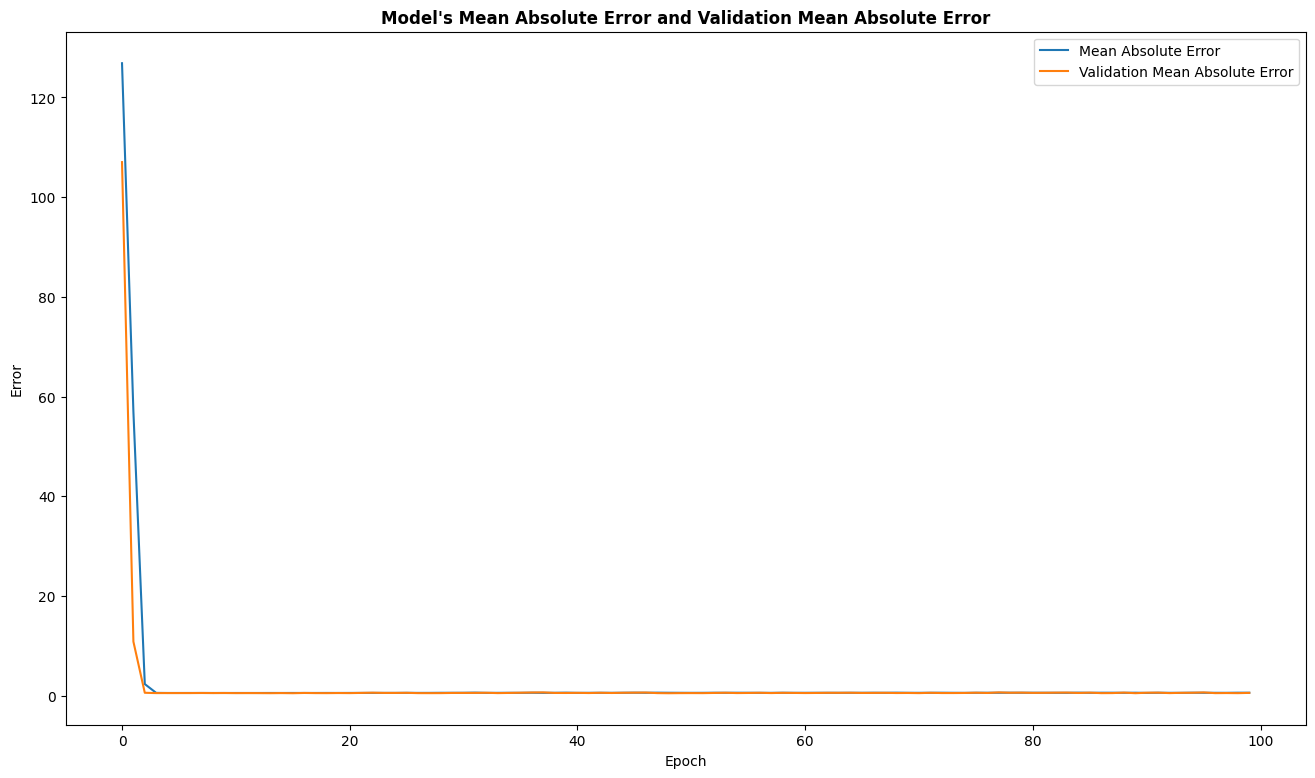

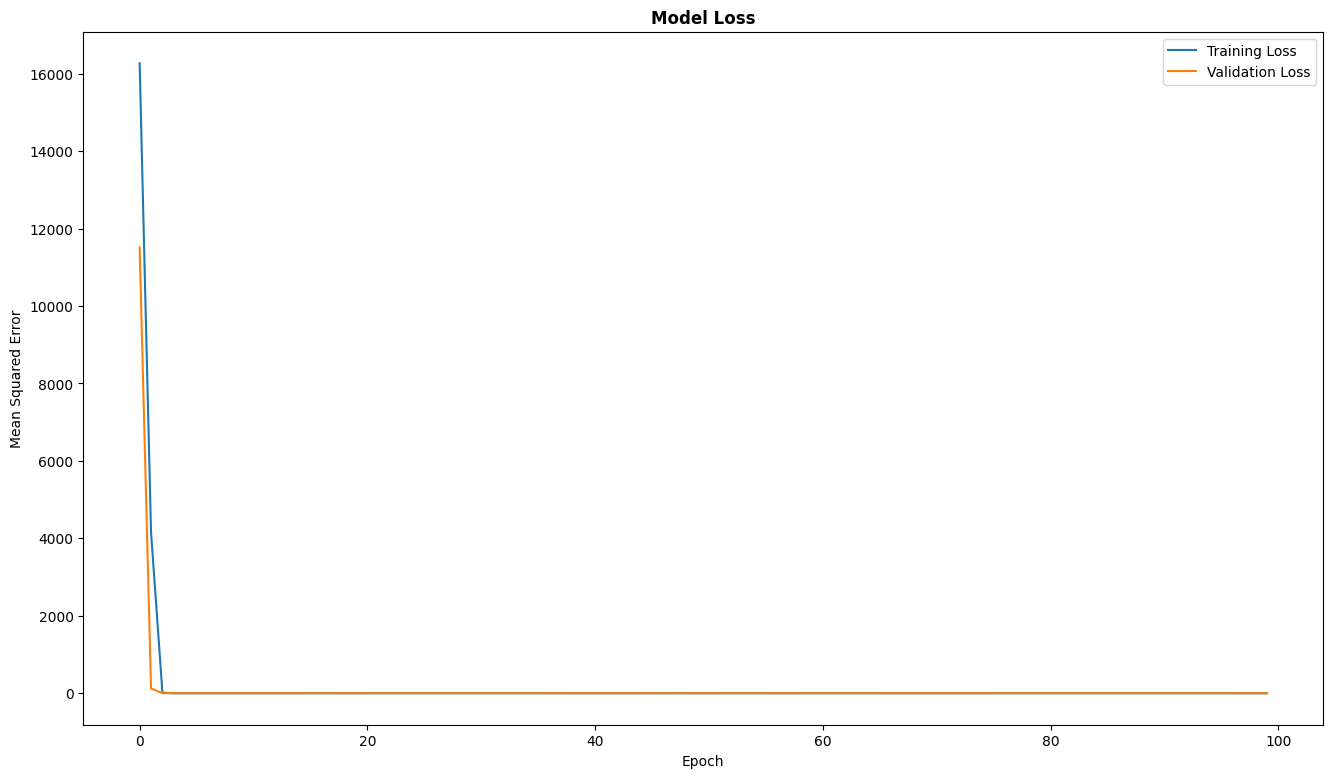

In [86]:
# Plot the Mean Absolute Error and Mean Squared Error during training
plt.figure(figsize=(16, 9))
plt.plot(history.history['mean_absolute_error'], label='Mean Absolute Error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation Mean Absolute Error')
plt.title("Model's Mean Absolute Error and Validation Mean Absolute Error", fontweight = 'bold')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontweight = 'bold')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


### Predictions

In [88]:
#Train Predictions
Y_train_pred = final_model.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = Y_train
train_prediction['Train_Probability'] = Y_train_pred
print(train_prediction.shape)
train_prediction.head(10)

376/376 [==============================] - 1s 2ms/step
(12031, 2)


Train_Actual  Train_Probability
6307         109.34         109.591393
4342         133.84         133.875748
1068         160.83         160.694733
9659         133.74         133.722519
4800         134.79         134.379822
2470         108.89         108.812111
13379        135.74         136.078659
14323        165.13         165.623627
12546        133.76         133.902985
553          117.76         117.499237

In [87]:
# Test Predictions
Y_test_pred = final_model.predict(X_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = Y_test
test_prediction['Test_Predicted'] = Y_test_pred
print(test_prediction.shape)
test_prediction.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 2)


Test_Actual  Test_Predicted
13312       134.46      134.661163
12627       111.88      112.055122
6393        133.72      134.225632
4990        133.79      134.011780
12462       110.77      110.703499
7405        113.32      116.813240
10993       133.77      133.355591
9488        128.98      128.306702
14201       159.42      160.580261
9757        161.86      161.214645

## Calculating Absolute Percent Error and Error

In [89]:
# Computing the absolute percent error
APE=100*(abs(test_prediction['Test_Actual']-test_prediction['Test_Predicted'])/test_prediction['Test_Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
test_prediction['APE %']=APE
test_prediction.head()

The Accuracy for Test Data -- ANN model =  99.58666341939839


Test_Actual  Test_Predicted     APE %
13312       134.46      134.661163  0.149608
12627       111.88      112.055122  0.156527
6393        133.72      134.225632  0.378127
4990        133.79      134.011780  0.165767
12462       110.77      110.703499  0.060035

In [91]:
test_prediction['Error'] = (test_prediction['Test_Actual'] - test_prediction['Test_Predicted'])/(test_prediction['Test_Actual'])
test_prediction.reset_index(drop = True)

Test_Actual  Test_Predicted     APE %     Error
0          134.46      134.661163  0.149608 -0.001496
1          111.88      112.055122  0.156527 -0.001565
2          133.72      134.225632  0.378127 -0.003781
3          133.79      134.011780  0.165767 -0.001658
4          110.77      110.703499  0.060035  0.000600
...           ...             ...       ...       ...
3003       119.25      119.340225  0.075661 -0.000757
3004       133.74      134.118378  0.282920 -0.002829
3005       146.31      145.687103  0.425738  0.004257
3006       150.07      149.876404  0.129004  0.001290
3007       111.77      111.865852  0.085759 -0.000858

[3008 rows x 4 columns]

## Visualizing the Relationship between the Actual and Predicted Values

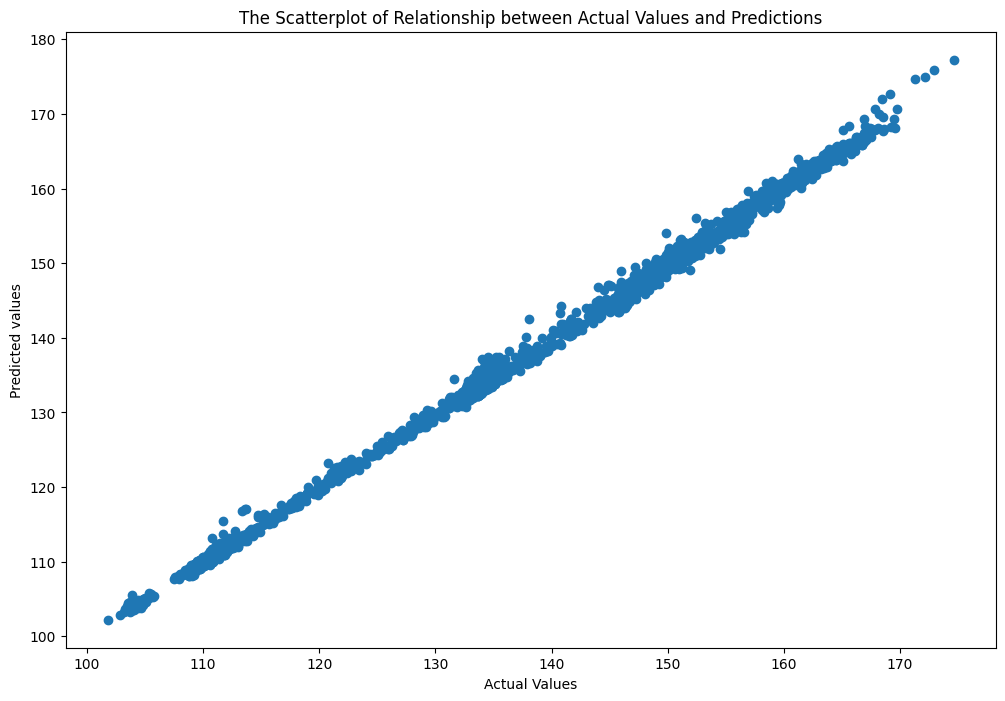

In [92]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

In [94]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(Y_test,Y_test_pred))
print ("MSE:",metrics.mean_squared_error(Y_test,Y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)))

MAE: 0.5620194842967582
MSE: 0.5610450616645024
RMSE: 0.7490294130836935


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Y_test_pred = final_model.predict(X_test)
Y_test_pred = final_model.predict(X_test)
print('R2_score (train): ',r2_score(Y_train, Y_train_pred))
print('R2_score (test): ',r2_score(Y_test, Y_test_pred))

94/94 [==============================] - 0s 2ms/step
R2_score (train):  0.9976354848019973
R2_score (test):  0.9977593118006687


In [107]:
#Evaluation of  the explained variance score (R^2)
print('This indicates that our model accurately predicts {} % of the target values.'.format(np.round(metrics.explained_variance_score(Y_test,Y_test_pred)*100,2)))

This indicates that our model accurately predicts 99.78 % of the target values.
